In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load the dataset
df = pd.read_csv(r"C:\Users\HP\Desktop\Extion Projects\Predicting Real Estate Prices\data\train.csv")  
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

df.describe()

# Check for missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Columns with Missing Values:\n", missing)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

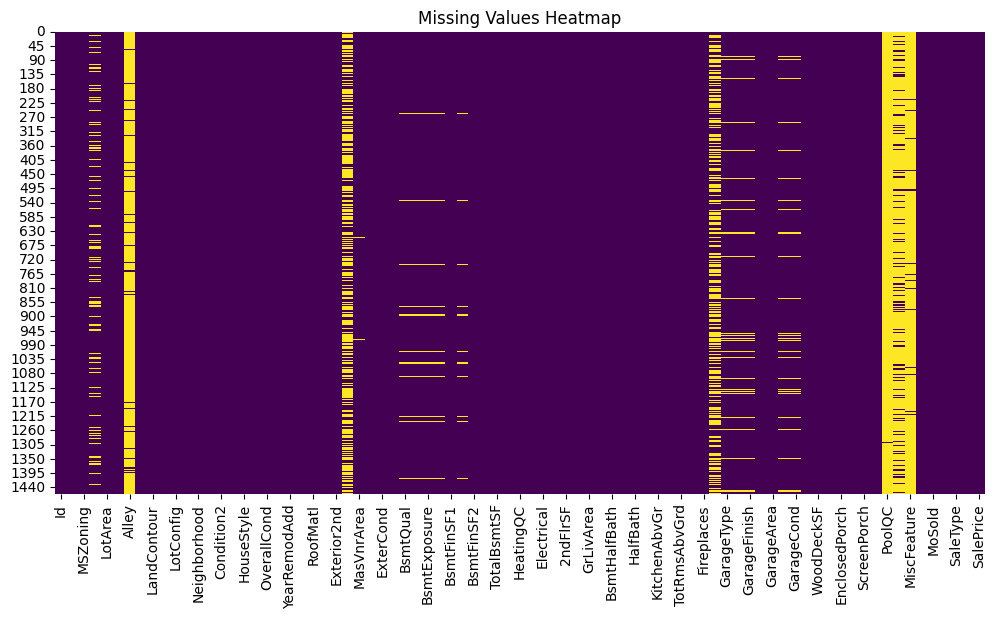

In [25]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


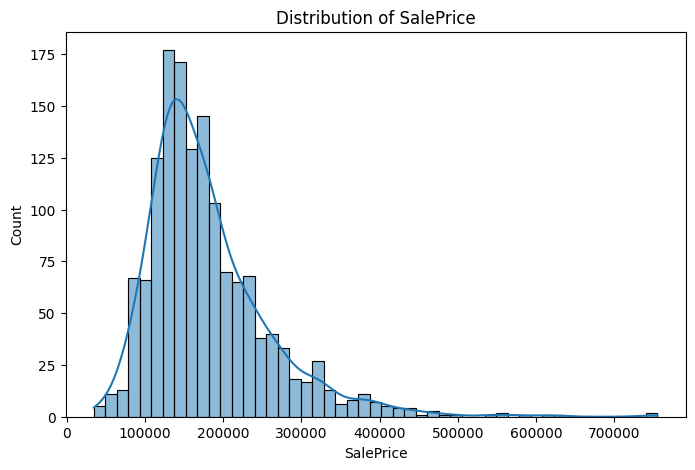

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.show()


In [27]:
# Correlation with SalePrice
corr = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
print("Top Correlated Features:\n", corr.head(10))


Top Correlated Features:
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


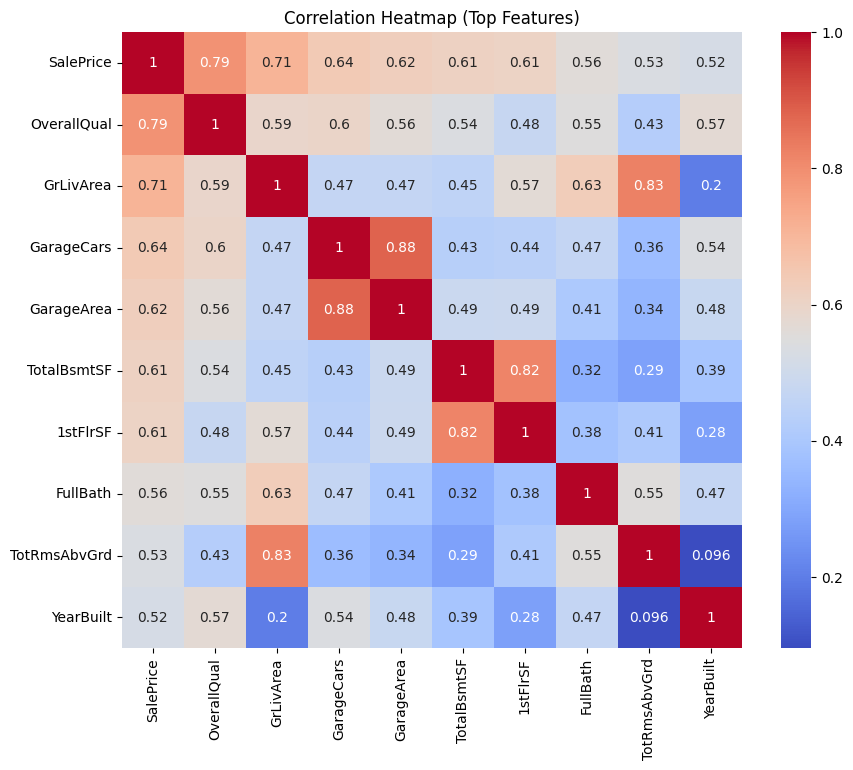

In [28]:
# Heatmap of top correlated features
top_corr = df[corr.head(10).index]
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Top Features)")
plt.show()

In [ ]:
# Drop columns with too many missing values 

missing_threshold = 0.5
missing_ratio = df.isnull().sum() / len(df)
cols_to_drop = missing_ratio[missing_ratio > missing_threshold].index
print("Dropping columns due to high missing values:", list(cols_to_drop))
df.drop(columns=cols_to_drop, inplace=True)

# Identify column types
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing values
from sklearn.impute import SimpleImputer

if len(num_cols) > 0:
    num_imputer = SimpleImputer(strategy='median')
    df[num_cols] = num_imputer.fit_transform(df[num_cols])

if len(cat_cols) > 0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])
    
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("After preprocessing, dataset shape:", df.shape)


Dropping columns due to high missing values: ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']
After preprocessing, dataset shape: (1460, 235)


In [ ]:
numeric_df = df.select_dtypes(include=[np.number])

correlations = numeric_df.corr()['SalePrice'].sort_values(ascending=False)

# Display top correlated features
print("Top correlated features with SalePrice:\n")
print(correlations.head(15))

# Set threshold for selection  
threshold = 0.4
selected_features = correlations[abs(correlations) > threshold].index.tolist()

# Remove 'SalePrice' itself from features list
selected_features.remove('SalePrice')

print("\nSelected features based on correlation threshold:")
print(selected_features)


Top correlated features with SalePrice:

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
GarageYrBlt     0.466754
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

Selected features based on correlation threshold:
['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'GarageYrBlt']


In [ ]:
# Define selected features
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
                     '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
                     'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'GarageYrBlt']

# Define input (X) and target (y)
X = df[selected_features]
y = df['SalePrice']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Prediction on test set
y_pred = lr_model.predict(X_test)


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Linear Regression Performance:
MAE: 24625.69
RMSE: 38436.73
R² Score: 0.8074


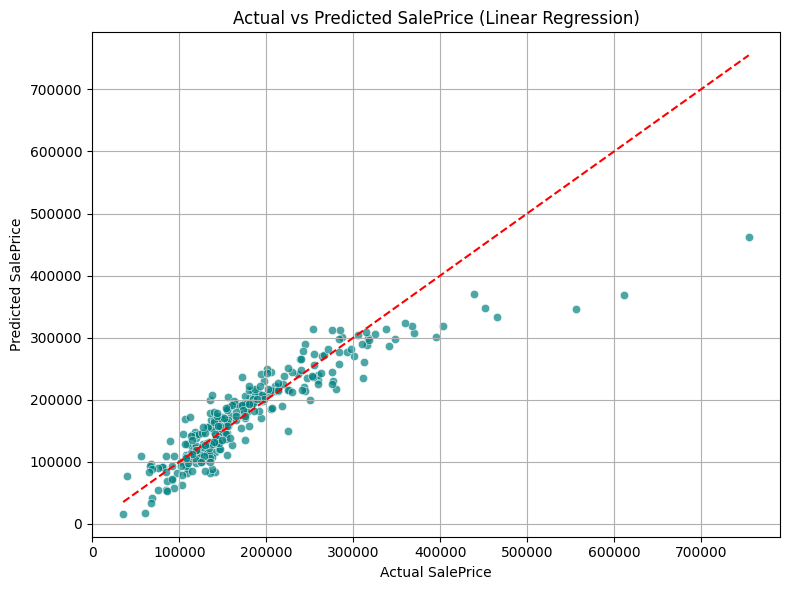

In [ ]:
# Predict on test set
y_pred = lr_model.predict(X_test)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Perfect prediction line
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Train Ridge Regression model
ridge = Ridge(alpha=1.0)  
ridge.fit(X_train, y_train)

# Predict on test set
ridge_pred = ridge.predict(X_test)

# Evaluation 
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_r2 = r2_score(y_test, ridge_pred)

print("Ridge Regression Performance:")
print(f"MAE: {ridge_mae:.2f}")
print(f"RMSE: {ridge_rmse:.2f}")
print(f"R² Score: {ridge_r2:.4f}")


Ridge Regression Performance:
MAE: 24619.04
RMSE: 38433.88
R² Score: 0.8074


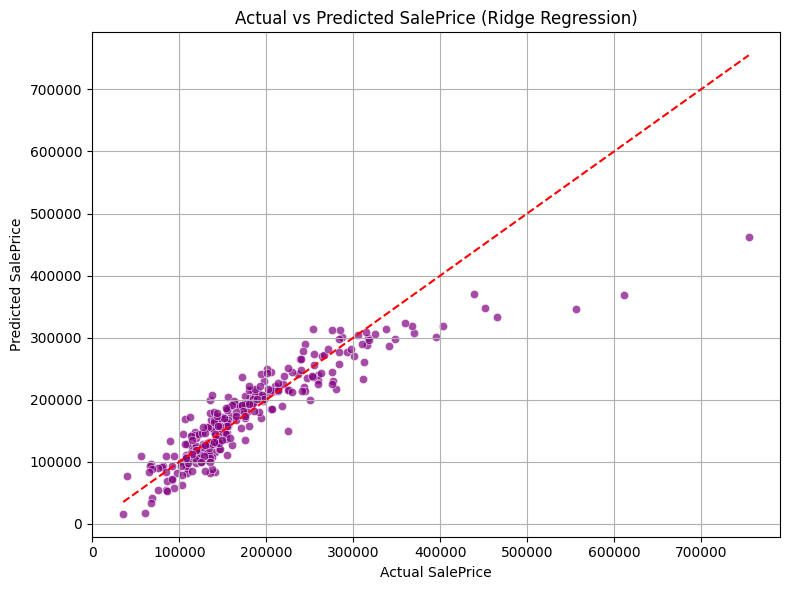

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=ridge_pred, alpha=0.7, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice (Ridge Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()
